#### Bibliotecas e Base de Dados

In [28]:
import pandas as pd
import os
import math
from statsmodels.tsa.seasonal import STL
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.metrics import silhouette_score

%matplotlib inline
import matplotlib.pyplot as plt
# Carregar o dataframe tratado
df = pd.read_csv("base_tratada_lingualab.csv")


In [29]:
df

ID_Cliente    Motivo  Education     Cidade   Renda_anual  \
0              0    Viagem  Gradua√ß√£o  S√£o Paulo  58138.000000   
1              1  Trabalho  Gradua√ß√£o    Taubat√©  46344.000000   
2              3    Viagem  Gradua√ß√£o  S√£o Paulo  20941.846715   
3              4  Trabalho  Doutorado  S√£o Paulo  58293.000000   
4              5  Trabalho   Mestrado  S√£o Paulo  60704.888889   
...          ...       ...        ...        ...           ...   
2104        2234    Viagem  Gradua√ß√£o  S√£o Paulo  34421.000000   
2105        2235  Trabalho  Gradua√ß√£o  S√£o Paulo  60704.888889   
2106        2237    Viagem  Gradua√ß√£o  S√£o Paulo  56981.000000   
2107        2238  Trabalho   Mestrado  S√£o Paulo  69245.000000   
2108        2239   Estudos  Doutorado  S√£o Paulo  55562.055556   

                  Aulas  NPS  Num_Aulas  Ano_de_nascimento  Banheiros_na_casa  \
0                Ingles    4         19               1983                  3   
1              Espanhol    4         10               1980                  4   
2              Espanhol    4         22               2010                  1   
3                Ingles    3          8               2007                  3   
4              Espanhol    3          9               1993                  4   
...                 ...  ...        ...                ...                ...   
2104           Espanhol    4         13               2000                  2   
2105  Espanhol e Ingles    4         12               1993                  4   
2106  Espanhol e Ingles    3          1               2007                  3   
2107             Ingles    4         14               1982                  3   
2108             Ingles    3         30               1980                  3   

      Quartos_na_casa  motivo_na  renda_na Quartos_Banheiros faixa_idade  
0                   4      False     False             4Q_3B       1980s  
1                   3      False     False             3Q_4B       1980s  
2                   1      False      True             1Q_1B       2010s  
3                   4      False     False             4Q_3B       2000s  
4                   4      False      True             4Q_4B       1990s  
...               ...        ...       ...               ...         ...  
2104                2      False     False             2Q_2B       2000s  
2105                4      False      True             4Q_4B       1990s  
2106                4      False     False             4Q_3B       2000s  
2107                5      False     False             5Q_3B       1980s  
2108                4       True      True             4Q_3B       1980s  

[2109 rows x 15 columns]

In [30]:
df.describe()

ID_Cliente    Renda_anual          NPS    Num_Aulas  \
count  2109.000000    2109.000000  2109.000000  2109.000000   
mean   1124.458511   50987.339256     2.793267    16.349455   
std     647.937902   20534.583248     1.185352    11.641006   
min       0.000000    1730.000000     1.000000     1.000000   
25%     560.000000   34578.000000     2.000000     8.000000   
50%    1125.000000   50737.000000     3.000000    13.000000   
75%    1689.000000   67542.798658     4.000000    23.000000   
max    2239.000000  105471.000000     5.000000    53.000000   

       Ano_de_nascimento  Banheiros_na_casa  Quartos_na_casa  
count        2109.000000        2109.000000      2109.000000  
mean         1995.576102           2.953532         3.415837  
std            11.581758           1.407395         1.721103  
min          1919.000000           1.000000         1.000000  
25%          1987.000000           2.000000         2.000000  
50%          1997.000000           3.000000         3.000000  
75%          2004.000000           4.000000         5.000000  
max          2022.000000           5.000000         6.000000

# Analise Macro

#### PERFIL E SEGMENTA√á√ÉO DE CLIENTES

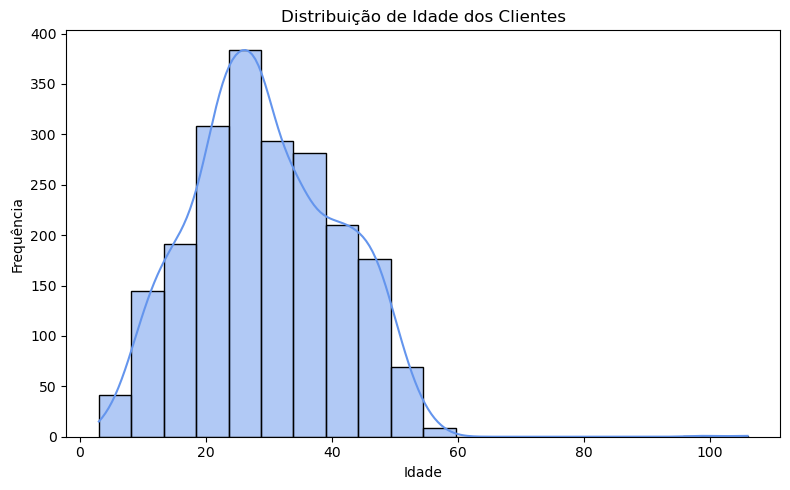

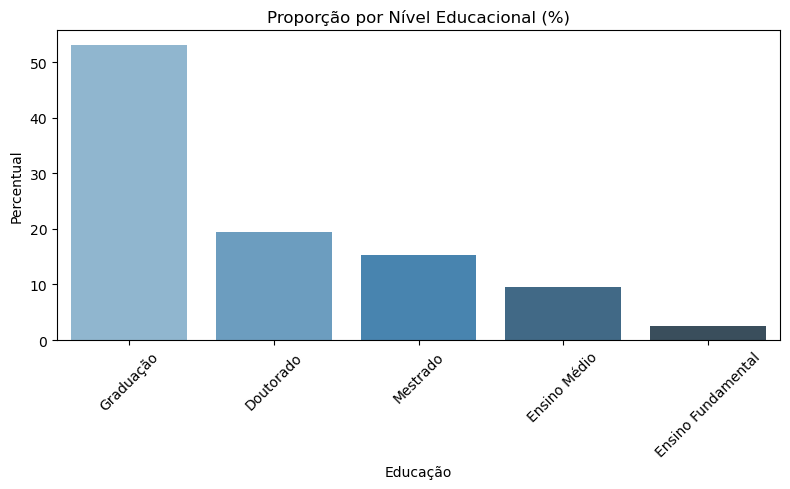

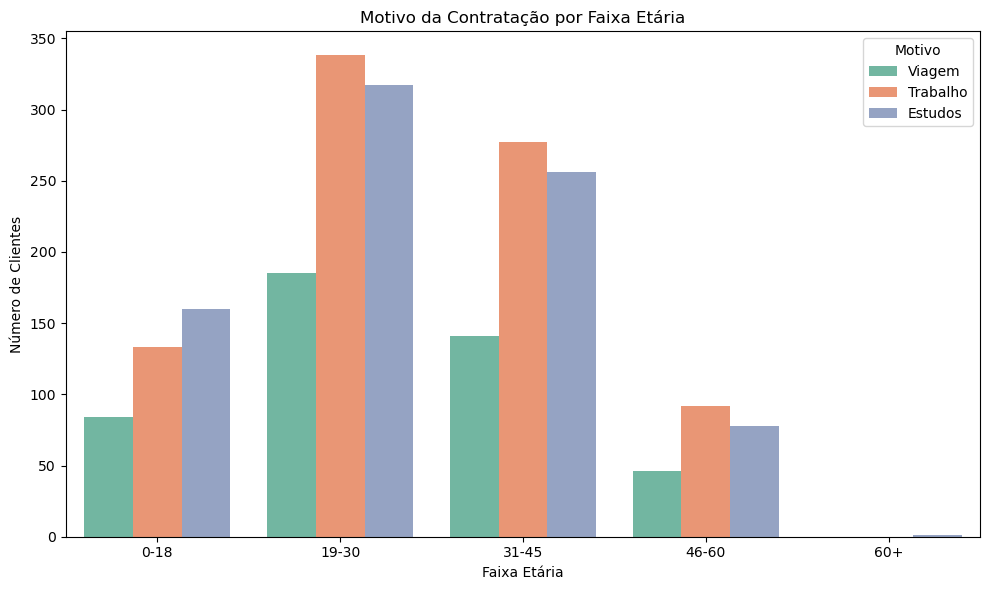

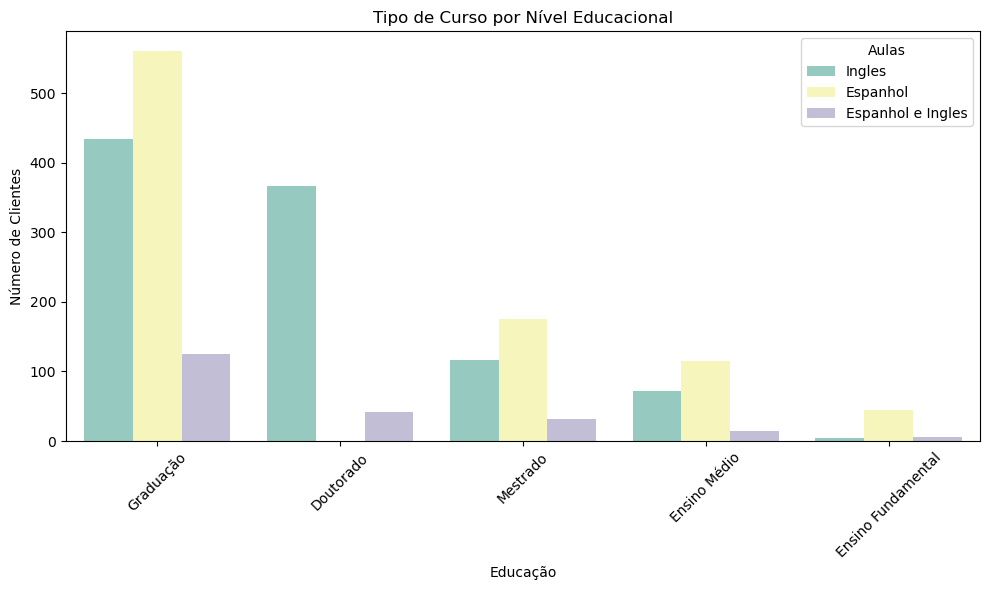

In [31]:

# Adicionando coluna de idade
current_year = datetime.now().year
df["Idade"] = current_year - df["Ano_de_nascimento"]

# Faixa et√°ria
df["Faixa_Etaria"] = pd.cut(df["Idade"], bins=[0, 18, 30, 45, 60, 100],
                            labels=["0-18", "19-30", "31-45", "46-60", "60+"])


# Plot 1: Distribui√ß√£o de idade (histograma)
plt.figure(figsize=(8, 5))
sns.histplot(df["Idade"], bins=20, kde=True, color="cornflowerblue")
plt.title("Distribui√ß√£o de Idade dos Clientes")
plt.xlabel("Idade")
plt.ylabel("Frequ√™ncia")
plt.tight_layout()
plt.show()

# Plot 2: Propor√ß√£o por n√≠vel educacional
plt.figure(figsize=(8, 5))
edu_counts = df["Education"].value_counts(normalize=True).sort_values(ascending=False) * 100
sns.barplot(x=edu_counts.index, y=edu_counts.values, palette="Blues_d")
plt.title("Propor√ß√£o por N√≠vel Educacional (%)")
plt.ylabel("Percentual")
plt.xlabel("Educa√ß√£o")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Motivo da contrata√ß√£o por faixa et√°ria
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Faixa_Etaria", hue="Motivo", palette="Set2")
plt.title("Motivo da Contrata√ß√£o por Faixa Et√°ria")
plt.xlabel("Faixa Et√°ria")
plt.ylabel("N√∫mero de Clientes")
plt.tight_layout()
plt.show()

# Plot 4: Tipo de curso por perfil educacional
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Education", hue="Aulas", palette="Set3", order=edu_counts.index)
plt.title("Tipo de Curso por N√≠vel Educacional")
plt.xlabel("Educa√ß√£o")
plt.ylabel("N√∫mero de Clientes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


clusteriza√ß√£o com o algoritmo K-Means.

In [36]:


# Calcular a idade
df['Idade'] = datetime.now().year - df['Ano_de_nascimento']

# Converter 'Education' para formato ordinal
education_order = {
    'Ensino Fundamental': 1,
    'Ensino M√©dio': 2,
    'Gradua√ß√£o': 3,
    'Mestrado': 4,
    'Doutorado': 5
}
df['Edu_Ordinal'] = df['Education'].map(education_order)

# Selecionar vari√°veis para clusteriza√ß√£o
cluster_df = df[['Idade', 'Renda_anual', 'Num_Aulas', 'NPS', 'Banheiros_na_casa', 'Quartos_na_casa', 'Edu_Ordinal']].copy()

# Padronizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

# Aplicar KMeans (4 clusters como exemplo)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Gerar resumo por cluster
cluster_summary = df.groupby('Cluster').agg({
    'Edu_Ordinal': 'mean',
    'Idade': 'mean',
    'Renda_anual': 'mean',
    'Num_Aulas': 'mean',
    'NPS': 'mean',
    'ID_Cliente': 'count'
}).rename(columns={'ID_Cliente': 'Qtd_Clientes'})

# Exibir a tabela resumo
print("\nResumo por Cluster:")
print(cluster_summary.round(2))



Resumo por Cluster:
         Edu_Ordinal  Idade  Renda_anual  Num_Aulas   NPS  Qtd_Clientes
Cluster                                                                
0               3.38  31.06     71670.82      17.71  2.97           844
1               2.85  24.12     30843.16      10.73  2.32           724
2               4.15  33.97     45677.78      21.74  3.15           541


Valida√ß√µes da clusterizacao 

A in√©rcia mede qu√£o compactos os clusters est√£o. O gr√°fico mostra a in√©rcia para diferentes valores de k (n√∫mero de clusters). Quando a redu√ß√£o da in√©rcia come√ßa a diminuir (o ‚Äúcotovelo‚Äù), esse √© o n√∫mero ideal de clusters.

Coeficiente de Silhueta (Silhouette Score)
Esse valor varia entre -1 e 1:
Pr√≥ximo de 1: pontos est√£o bem dentro dos seus clusters;
Pr√≥ximo de 0: pontos est√£o entre clusters;
Negativo: pontos podem estar em clusters errados.

Visualiza√ß√£o em 2D com PCA
Reduzimos a base para 2 dimens√µes com PCA e plotamos os clusters. Se os grupos forem bem separados visualmente, isso valida a segmenta√ß√£o.

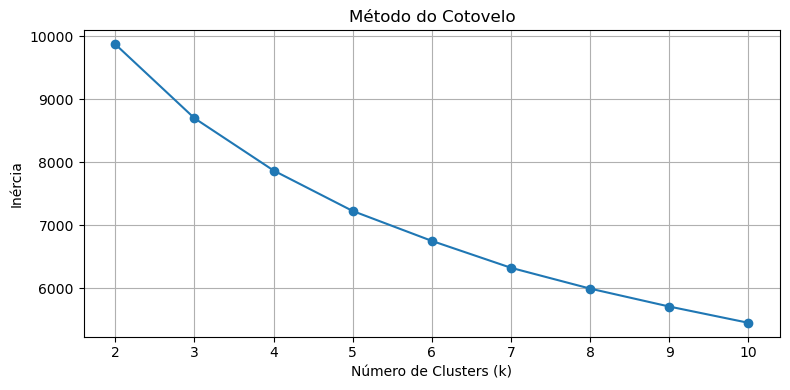


Silhouette Score para k=3: 0.2133


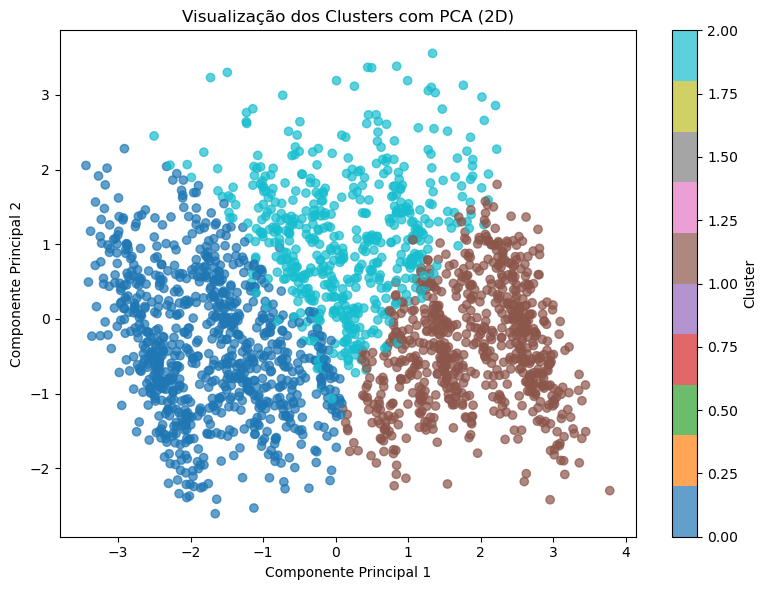

In [40]:


X = df[['Idade', 'Renda_anual', 'Num_Aulas', 'NPS', 'Banheiros_na_casa', 'Quartos_na_casa', 'Edu_Ordinal']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cotovelo
inertias = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertias, marker='o')
plt.title('M√©todo do Cotovelo')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('In√©rcia')
plt.grid(True)
plt.tight_layout()
plt.show()

#Silhouette Score 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
sil_score = silhouette_score(X_scaled, clusters)
print(f"\nSilhouette Score para k=3: {sil_score:.4f}")

# PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', alpha=0.7)
plt.title('Visualiza√ß√£o dos Clusters com PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()



Cluster 0 ‚Äì Profissionais adultos com renda alta e engajamento moderado (maior grupo)

Cluster 1 ‚Äì Jovens em forma√ß√£o, baixa renda, menor escolaridade

Cluster 2 ‚Äì Altamente educados, renda m√©dia, forte presen√ßa de mestrado/doutorado

Com k=4
Separava mais nuances (como renda alta com baixa aula vs. muita aula com mesma renda), mas isso sacrificava a separa√ß√£o geral entre grupos (Silhouette menor, PCA mais embaralhado).

#### Clusteriza√ß√£o por DB Scan 

In [41]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA


# # Sele√ß√£o e padroniza√ß√£o
# X = df[['Idade', 'Renda_anual', 'Num_Aulas', 'NPS', 'Banheiros_na_casa', 'Quartos_na_casa', 'Edu_Ordinal']]
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Aplicar DBSCAN
# dbscan = DBSCAN(eps=1.3, min_samples=15)
# labels = dbscan.fit_predict(X_scaled)

# # Adicionar os r√≥tulos ao DataFrame
# df['DBSCAN_Cluster'] = labels

# # N√∫mero de clusters encontrados (excluindo ru√≠do)
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise = list(labels).count(-1)
# print(f"Clusters encontrados: {n_clusters}")
# print(f"Outliers detectados: {n_noise}")

# # Visualiza√ß√£o com PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)
# plt.title('Clusters via DBSCAN (com outliers em -1)')
# plt.xlabel('Componente Principal 1')
# plt.ylabel('Componente Principal 2')
# plt.colorbar(scatter, label='Cluster')
# plt.tight_layout()
# plt.show()


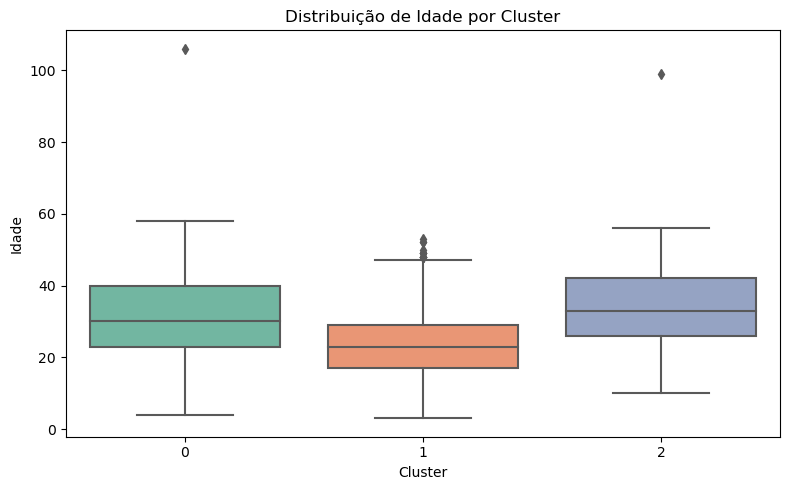

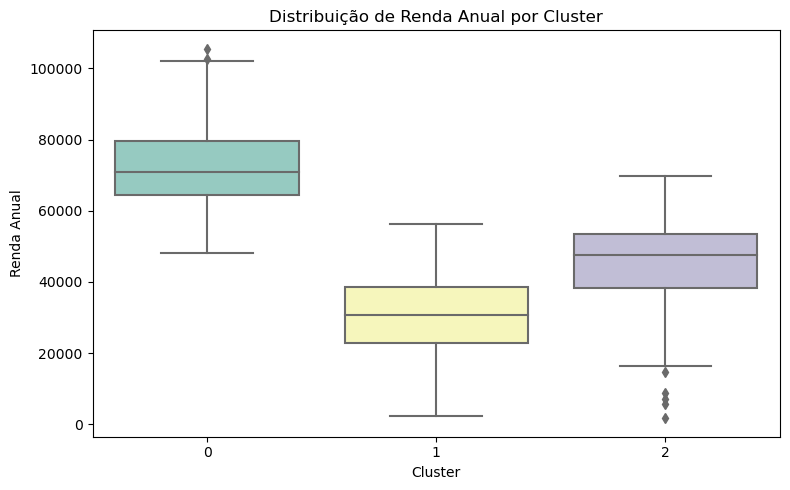

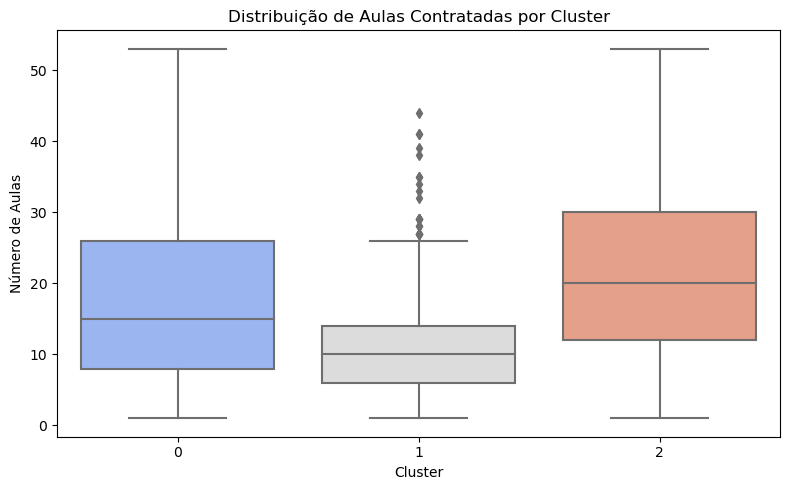

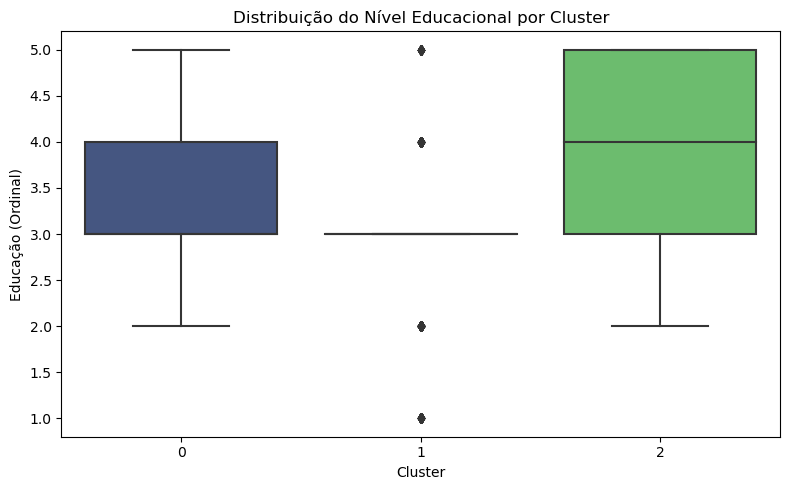

In [43]:

# Gr√°fico 1: Idade m√©dia por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster', y='Idade', palette='Set2')
plt.title('Distribui√ß√£o de Idade por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

# Gr√°fico 2: Renda m√©dia por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster', y='Renda_anual', palette='Set3')
plt.title('Distribui√ß√£o de Renda Anual por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Renda Anual')
plt.tight_layout()
plt.show()

# Gr√°fico 3: N√∫mero de aulas por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster', y='Num_Aulas', palette='coolwarm')
plt.title('Distribui√ß√£o de Aulas Contratadas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('N√∫mero de Aulas')
plt.tight_layout()
plt.show()

# Gr√°fico 4: N√≠vel educacional (ordinal) por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster', y='Edu_Ordinal', palette='viridis')
plt.title('Distribui√ß√£o do N√≠vel Educacional por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Educa√ß√£o (Ordinal)')
plt.tight_layout()
plt.show()


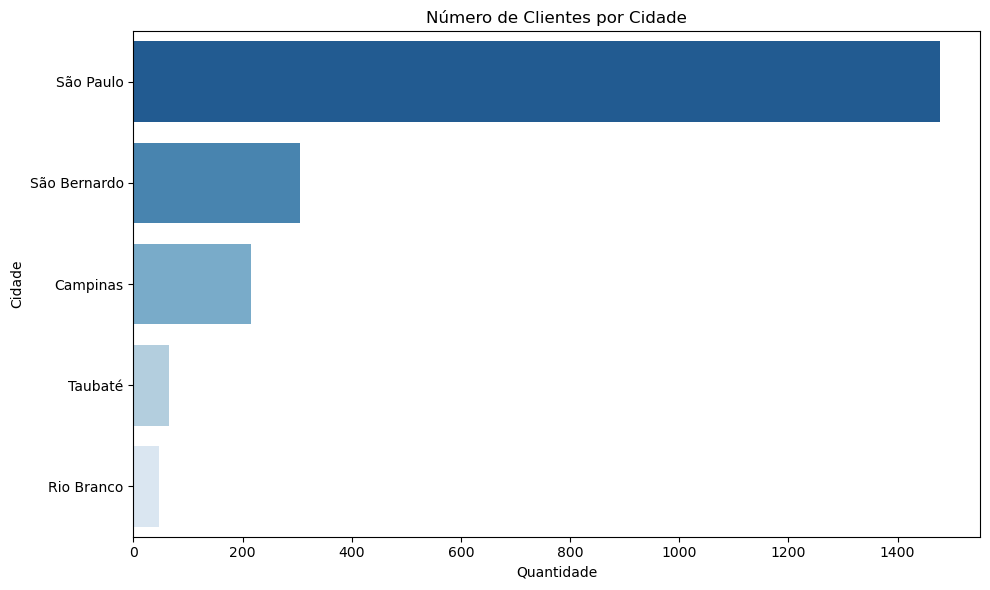

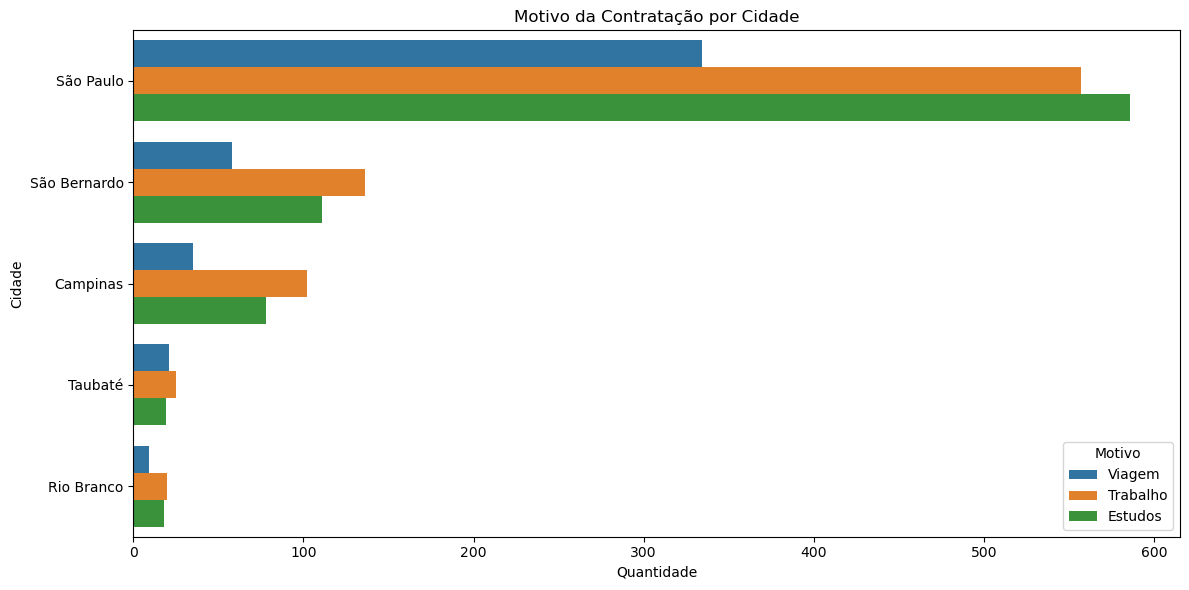

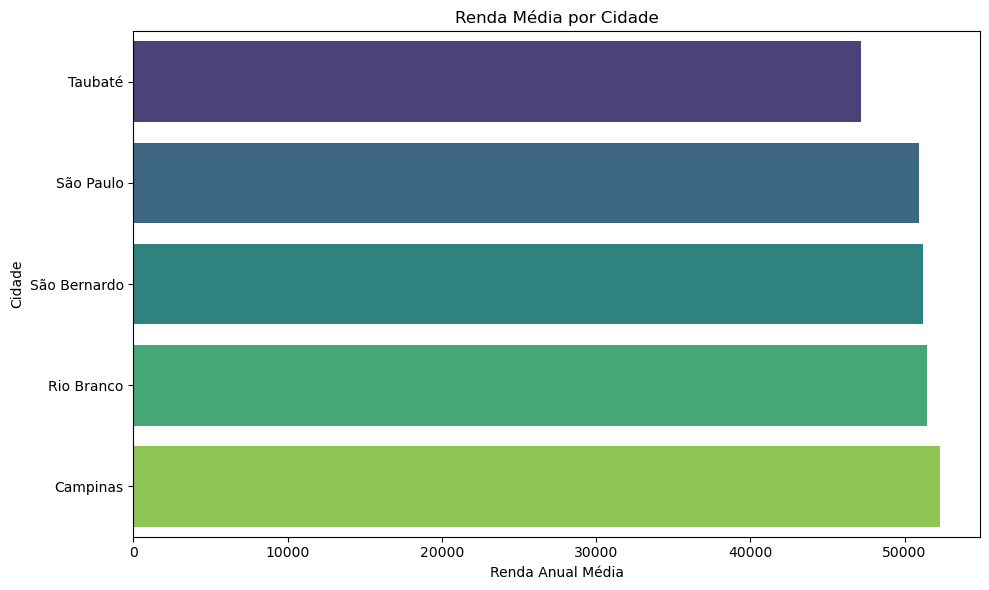

In [44]:
# Gr√°fico 1: Contagem absoluta de clientes por cidade
plt.figure(figsize=(10, 6))
cidade_order = df['Cidade'].value_counts().index
sns.countplot(data=df, y='Cidade', order=cidade_order, palette='Blues_r')
plt.title('N√∫mero de Clientes por Cidade')
plt.xlabel('Quantidade')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()

# Gr√°fico 2: Distribui√ß√£o por Motivo dentro de cada cidade (proporcional)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Cidade', hue='Motivo', order=cidade_order)
plt.title('Motivo da Contrata√ß√£o por Cidade')
plt.xlabel('Quantidade')
plt.ylabel('Cidade')
plt.legend(title='Motivo')
plt.tight_layout()
plt.show()

# Gr√°fico 3: Renda m√©dia por cidade
renda_cidade = df.groupby('Cidade')['Renda_anual'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=renda_cidade.values, y=renda_cidade.index, palette='viridis')
plt.title('Renda M√©dia por Cidade')
plt.xlabel('Renda Anual M√©dia')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()

cruzar cluster com cidade?

In [48]:
# T√≥pico 4 ‚Äî Poder Aquisitivo por Regi√£o (utilizando cidades como proxy de regi√£o)

# Calcular estat√≠sticas de renda por cidade
renda_stats = df.groupby('Cidade')['Renda_anual'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)
renda_stats = renda_stats.rename(columns={
    'mean': 'Renda M√©dia',
    'median': 'Renda Mediana',
    'count': 'Qtd Clientes',
    'std': 'Desvio Padr√£o'
})

## Reexibir a tabela de forma compat√≠vel com o ambiente do usu√°rio

renda_stats.reset_index(inplace=True)
renda_stats


Cidade   Renda M√©dia  Renda Mediana  Qtd Clientes  Desvio Padr√£o
0      Campinas  52278.814857        50785.0           215   20225.821415
1    Rio Branco  51462.870616        50116.0            47   20154.513148
2  S√£o Bernardo  51172.561184        51124.0           305   20791.609706
3     S√£o Paulo  50913.045999        50870.0          1477   20561.587128
4       Taubat√©  47190.742709        48007.5            65   20111.521835

üîπ 1. Perfil sociodemogr√°fico dos clientes
Vari√°veis-chave:
Ano_de_nascimento ‚Üí converter para idade
Education
Motivo (Viagem, Trabalho, Estudos)
Aulas (tipo de curso: Ingl√™s, Espanhol, Mandarim etc.)
An√°lises recomendadas:
Distribui√ß√£o de idade (histograma ou faixas et√°rias)
Propor√ß√£o por n√≠vel educacional
Motivo da contrata√ß√£o por faixa et√°ria
Tipo de curso por perfil educacional
üîπ 2. N√≠vel educacional m√©dio por cluster
Estrat√©gia:
Usar Education como vari√°vel categ√≥rica ordinal:
Ensino Fundamental = 1
Ensino M√©dio = 2
Gradua√ß√£o = 3
Mestrado = 4
Doutorado = 5
Realizar uma clusteriza√ß√£o com KMeans ou agrupamento hier√°rquico usando vari√°veis como:
Idade
N√∫mero de aulas (Num_Aulas)
NPS
Renda
Quantidade de banheiros/quartos
Depois, calcular a m√©dia educacional por cluster (convertendo a categoria em n√∫mero como acima)
üîπ 3. Distribui√ß√£o geogr√°fica da base
Vari√°vel-chave:
Cidade
An√°lises sugeridas:
Contagem absoluta de clientes por cidade
Propor√ß√£o relativa (porcentagem)
Distribui√ß√£o por Motivo, Education ou Aulas dentro de cada cidade
Representar graficamente (gr√°fico de barras ou mapa, se poss√≠vel)
üîπ 4. Poder aquisitivo por regi√£o
Vari√°veis:
Cidade
Renda_anual
An√°lises recomendadas:
M√©dia, mediana e desvio padr√£o da Renda_anual por cidade
Boxplot de Renda_anual por cidade
Cruzamento de renda com Education e Motivo dentro de cada cidade (para identificar perfis de alto ticket)
Detec√ß√£o de outliers por cidade (ajuda na precifica√ß√£o e segmenta√ß√£o de campanhas)